In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
data = pd.read_csv('train.csv')
data

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,6128,s6129,TV Show,The Big Family Cooking Showdown,NaN,"Zoe Ball, Nadiya Hussain, Giorgio Locatelli, R...",United Kingdom,"February 22, 2019",2018,2,"In this unscripted series, families passionate...",British TV
1,7018,s7019,TV Show,The World's Most Extraordinary Homes,NaN,"Piers Taylor, Caroline Quentin",United Kingdom,"January 18, 2019",2019,3,Award-winning architect Piers Taylor and actre...,British TV
2,4657,s4658,TV Show,One-Punch Man,NaN,"Makoto Furukawa, Kaito Ishikawa, Yuki Kaji, Ao...",Japan,"March 20, 2017",2015,1,The most powerful superhero in the world can k...,Anime Series
3,6167,s6168,Movie,The Boy Who Harnessed the Wind,Chiwetel Ejiofor,"Maxwell Simba, Chiwetel Ejiofor, Aïssa Maïga, ...",United Kingdom,"March 1, 2019",2019,114,"Inspired by a science book, 13-year-old Willia...",Children
4,3562,s3563,Movie,"LeapFrog: Sing-along, Read-along",Ron Myrick,"Julie Maddalena, Cindy Robinson",NaN,"April 15, 2020",2011,32,"Using rhythm and rhymes, a funky band and a co...",Children
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,346,s347,Movie,Ahista Ahista,Shivam Nair,"Abhay Deol, Soha Ali Khan, Shayan Munshi, Kami...",India,"December 31, 2019",2006,122,"Stood up by her groom at the altar, a young wo...",Dramas
6219,5766,s5767,Movie,Spookley and the Christmas Kittens,Bernie Denk,"Vlasta Vrana, Sonja Ball, Craig Francis, Richa...",United States,"November 30, 2020",2019,45,When a green cat and three stray kittens wind ...,Children
6220,6131,s6132,Movie,The Bill Murray Stories: Life Lessons Learned ...,Tommy Avallone,"Tommy Avallone, Bill Murray, Joel Murray, Pete...",United States,"December 31, 2018",2018,72,This documentary highlights spontaneous encoun...,Documentaries
6221,124,s125,Movie,5Gang,Matei Dima,"Andrei Selaru, Dorian Popa, Julia Marcan, Ana ...",Romania,"April 27, 2020",2019,96,"To keep the band together, Selly tries to earn...",Comedies


In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, random_state=42)

In [9]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

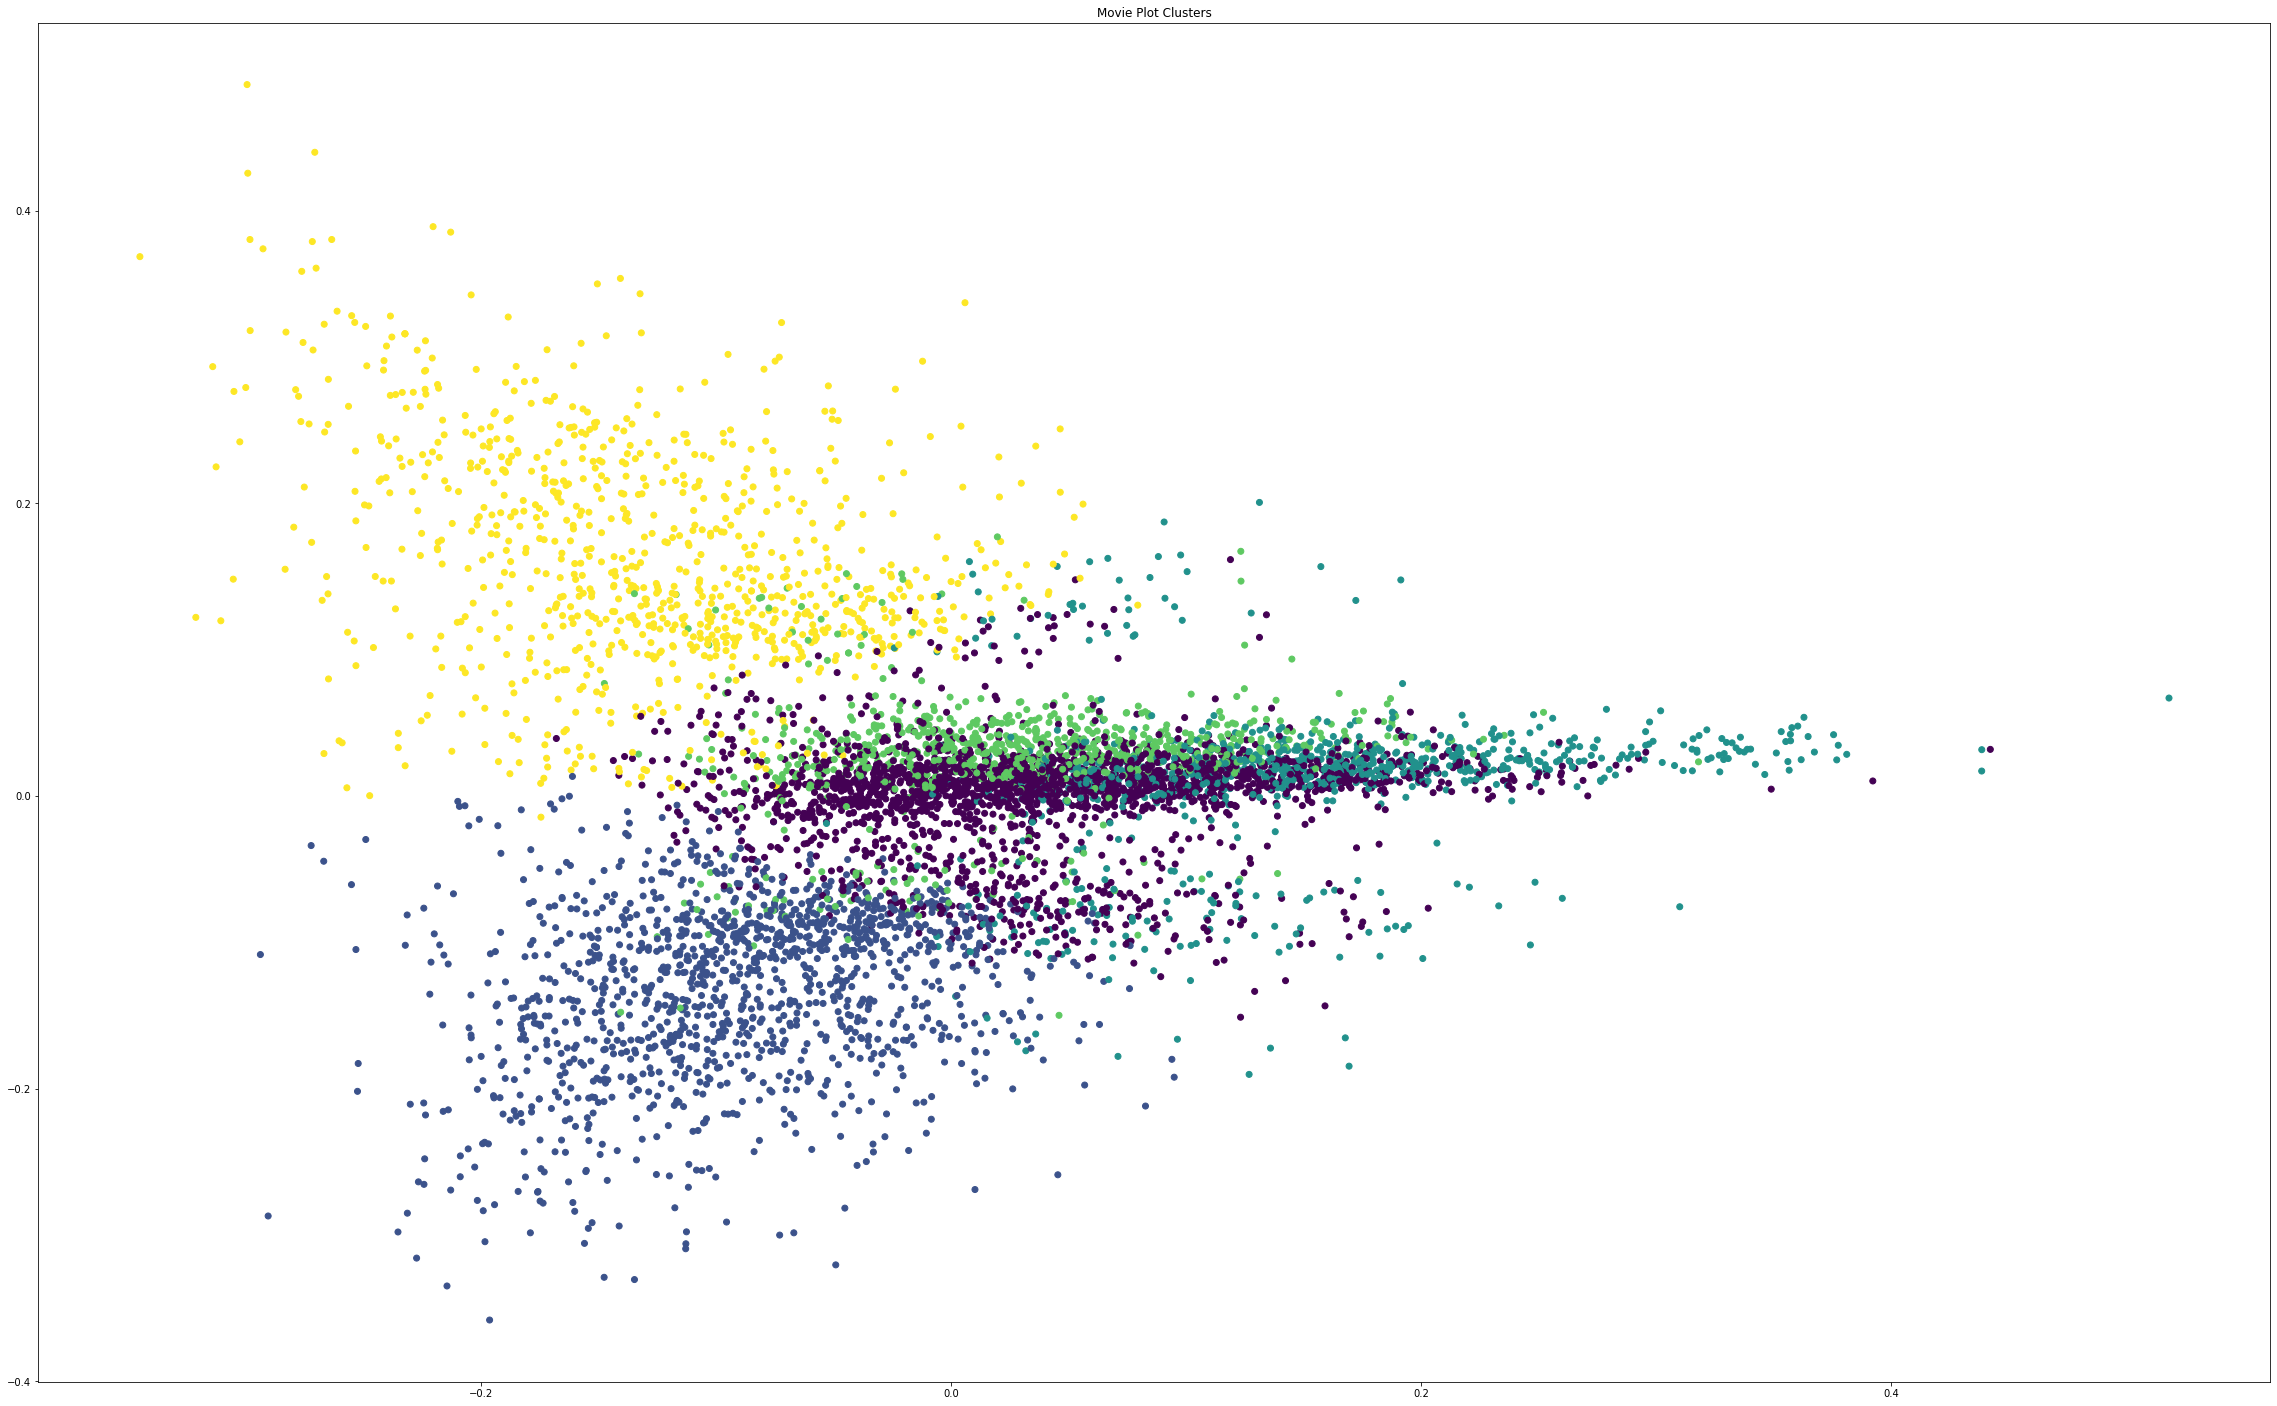

In [10]:
plt.figure(figsize=(40, 25))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Movie Plot Clusters")
plt.show()